#The Data is Collected Online from Centers for Disease Control and Prevention, State Cancer Profiles, and United States Census Bureau

#This dataset can be used to answer questions on the correlation between poverty levels, insurance levels and cancer incidence levels. Further, one can find which cancers affect a certain race more or a certain state.

In [80]:
import os
import pandas as pd
import numpy as np

path= r"C:\Users\Lenovo\Desktop"
os.chdir(path)
os.listdir(path)
Cancer_occurance= pd.read_csv("Cancer_Occurrence.csv")
Cancer= pd.read_csv("Cancer.csv")
State= pd.read_csv("State.csv")
Year_wise = pd.read_csv("Year wise Cancer Death-Rates.csv")

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns

In [76]:
State.shape

(52, 10)

In [31]:
Cancer1=Cancer.groupby('Category').size().reset_index()
Cancer1.head()

,Category,0
0,Bones and Joints,1
1,Brain and Other Nervous System,2
2,Digestive System,12
3,Endocrine System,2
4,Eye and Orbit,1


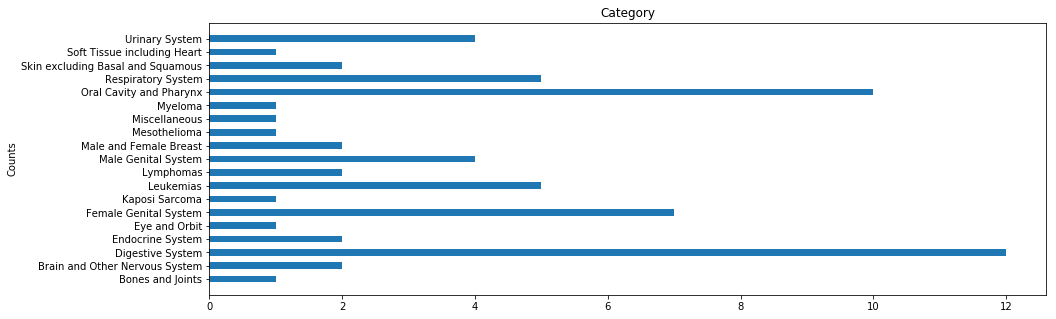

In [73]:
plt.figure(figsize=(15,5))
plt.barh(Cancer1['Category'],Cancer1[0],align='center',height= 0.5)
plt.ylabel('Counts')
plt.title('Category')
plt.show()

# Let's take a quick look at what the data looks like:

In [71]:
Cancer_occurance.head()

,Cancer_id,State_name,Race_name,Count
0,20010,Alabama,American Indian or Alaska Native,0
1,20010,Alabama,Asian or Pacific Islander,0
2,20010,Alabama,White,55
3,20010,Alabama,Other Races and Unknown combined,0
4,20010,Alaska,American Indian or Alaska Native,0


In [ ]:
# H0 = Race an influnce on Cancer
# h1 = Race does not influence Cancer

# alpha = 0.05

In [81]:
from scipy.stats import chi2_contingency

In [85]:
cont_table = pd.crosstab(index=Cancer_occurance.Count,columns=Cancer_occurance.Race_name)
cont_table.head()

Race_name,American Indian or Alaska Native,Asian or Pacific Islander,Black or African American,Other Races and Unknown combined,White
Count,,,,,
0,1873,1332,853,1432,65
16,8,20,34,14,38
17,6,11,23,18,34
18,9,12,31,16,28
19,4,13,24,8,24


In [86]:
chi2_contingency(cont_table)

(7277.871492041896,
 4.75594032949002e-210,
 3884,
 array([[1.12063262e+03, 9.84543805e+02, 1.02710656e+03, 9.85103841e+02,
         1.43761317e+03],
        [2.29976812e+01, 2.02048594e+01, 2.10783345e+01, 2.02163525e+01,
         2.95027725e+01],
        [1.85595322e+01, 1.63056760e+01, 1.70105857e+01, 1.63149511e+01,
         2.38092550e+01],
        ...,
        [2.01734046e-01, 1.77235608e-01, 1.84897671e-01, 1.77336425e-01,
         2.58796250e-01],
        [2.01734046e-01, 1.77235608e-01, 1.84897671e-01, 1.77336425e-01,
         2.58796250e-01],
        [2.01734046e-01, 1.77235608e-01, 1.84897671e-01, 1.77336425e-01,
         2.58796250e-01]]))

In [87]:
#For California Which Cancer type is decresing rapidly??


In [97]:
Calfilornia=pd.merge(Cancer,Cancer_occurance,left_on='Id',right_on='Cancer_id',how='inner')
Calfilornia.head()

,Id,Name,Category,Cancer_id,State_name,Race_name,Count
0,20010,Lip,Oral Cavity and Pharynx,20010,Alabama,American Indian or Alaska Native,0
1,20010,Lip,Oral Cavity and Pharynx,20010,Alabama,Asian or Pacific Islander,0
2,20010,Lip,Oral Cavity and Pharynx,20010,Alabama,White,55
3,20010,Lip,Oral Cavity and Pharynx,20010,Alabama,Other Races and Unknown combined,0
4,20010,Lip,Oral Cavity and Pharynx,20010,Alaska,American Indian or Alaska Native,0


In [98]:
q8 = Year_wise.groupby(['Year','Locality'])['Observed Deaths'].sum().reset_index()
q8.head()

,Year,Locality,Observed Deaths
0,2005,Metropolitan,8845728.0
1,2005,Nonmetropolitan,2039406.0
2,2006,Metropolitan,8856210.0
3,2006,Nonmetropolitan,2035764.0
4,2007,Metropolitan,8852160.0


C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


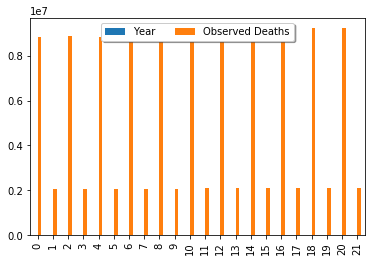

In [101]:
from matplotlib import pyplot as plt
q8.reset_index()
q8.plot(kind= "bar")

# Creating a subplot to place lagends

ax = plt.subplot(111)

ax.legend(loc='upper center', bbox_to_anchor=(
    , 1.00),
          ncol=4, fancybox=True, shadow=True)

plt.show()